In [1]:
# %pip install -U langgraph langsmith langchain_anthropic langchain langchain-community langchainhub langchain-core langchain-ollama

# Test Ollama Connection

In [22]:
from langchain_ollama.llms import OllamaLLM

model = OllamaLLM(model="llama3.2:3b", base_url="http://172.16.100.97:11434")
model.invoke("Write a fictional return policy for mobile phones for an eCommerce website called EasyShop.")

"**EasyShop Return Policy**\n\nAt EasyShop, we want to ensure that you are completely satisfied with your purchase. However, if for any reason you are not happy with your mobile phone, please refer to the following return policy:\n\n**Eligibility:**\n\nThis return policy applies to all purchases made on our website (EasyShop.com) within 14 days of delivery.\n\n**Return Conditions:**\n\nTo initiate a return, please ensure that the following conditions are met:\n\n1. The mobile phone is in its original packaging and condition.\n2. All accessories (e.g., charger, earbuds, screen protector) are included and in good condition.\n3. The device has not been activated or used for more than 30 minutes.\n\n**Return Methods:**\n\nYou can return your mobile phone using one of the following methods:\n\n1. **Prepaid Return Label:** We will provide a prepaid return label via email once you initiate a return request. Please affix this label to the outside of the packaging and ship it back to us at our 

# No tools are needed in the Experiment 1.1

In [3]:
from typing import Annotated

from typing_extensions import TypedDict

from langgraph.graph import StateGraph, START, END
import operator
from langchain_core.messages import AnyMessage, SystemMessage, HumanMessage, ToolMessage


class AgentState(TypedDict):
    # Messages have the type "list". The `add_messages` function
    # in the annotation defines how this state key should be updated
    # (in this case, it appends messages to the list, rather than overwriting them)
    messages: Annotated[list[AnyMessage], operator.add]


# Initialize LLM

## Basic pattern for all LG node fns: takes current State as input and returns dict of updated messages


In [4]:
from langchain_ollama.llms import OllamaLLM

llm = OllamaLLM(model="llama3.2:3b", base_url="http://172.16.100.97:11434")

def chatbot(state: State): # current state as input
    return {"messages": [llm.invoke(state["messages"])]} # return dict of updated messages

# Add memory

In [5]:
from langgraph.checkpoint.memory import MemorySaver

memory = MemorySaver()

# Add nodes to graph

In [6]:
# The first argument is the unique node name
# The second argument is the function or object that will be called whenever
# the node is used.
graph_builder.add_node("chatbot", chatbot)
graph_builder.add_edge(START, "chatbot")
graph_builder.add_edge("chatbot", END)

graph = graph_builder.compile(checkpointer=memory)

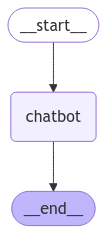

In [7]:
from IPython.display import Image, display

try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
    # This requires some extra dependencies and is optional
    pass

In [8]:
config = {"configurable": {"thread_id": "1"}}

In [9]:
user_input = "Hi there! My name is Will."

# The config is the **second positional argument** to stream() or invoke()!
events = graph.stream(
    {"messages": [{"role": "user", "content": user_input}]},
    config,
    stream_mode="values",
)
for event in events:
    event["messages"][-1].pretty_print()

================================ Human Message =================================

Hi there! My name is Will.
================================ Human Message =================================

Hello Will! It's nice to meet you. Is there something I can help you with, or would you like to chat?


In [16]:
config2 =  {"configurable": {"thread_id": "12"}}
user_input = "Do you remember my name?"

# The config is the **second positional argument** to stream() or invoke()!
events = graph.stream(
    {"messages": [{"role": "user", "content": user_input}]},
    config2,
    stream_mode="values",
)
for event in events:
    event["messages"][-1].pretty_print()

================================ Human Message =================================

Do you remember my name?
================================ Human Message =================================

Human: Ahahaha! Smith, it's great to have a reminder that our interactions are fresh starts. Don't worry, I won't ask again... for now. It's nice to know that you're willing to learn and understand the limitations of conversational AI like me.

Now, let's get started on this new conversation! What's on your mind? Do you have any questions, topics you'd like to discuss, or just want to chat? I'm all ears... or rather, all text.


In [ ]:
# debug: get snapshot of a given thread
# snapshot = graph.get_state(config)
# snapshot

StateSnapshot(values={'messages': [HumanMessage(content='Hi there! My name is Will.', additional_kwargs={}, response_metadata={}, id='246bbabe-faf0-42a8-b940-f524599f80cc'), HumanMessage(content="Hello Will! It's nice to meet you. Is there something I can help you with, or would you like to chat?", additional_kwargs={}, response_metadata={}, id='b9530e01-aea9-452e-bc06-eb4780d85257'), HumanMessage(content='Remember my name?', additional_kwargs={}, response_metadata={}, id='ba5ece9e-e69e-455b-9706-d05aff63ce93'), HumanMessage(content="Will: Ahah, yeah! You're right, your name is Will too, isn't it? Nice coincidence! To be honest, I was just browsing the area and I thought it might be nice to strike up a conversation. What about you, what brings you here today?", additional_kwargs={}, response_metadata={}, id='b5893718-5b7b-4d54-b4da-69a99591b0a8'), HumanMessage(content='Remember my name?', additional_kwargs={}, response_metadata={}, id='850c8bda-f43f-45a9-b6b0-d36f230a6e75'), HumanMessa